In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (1000, 5) and arg 1 with shape (1000,).

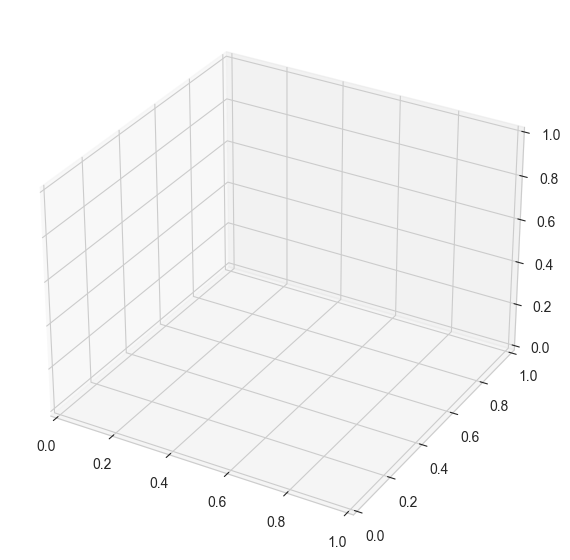

In [2]:
# Weights (including weight for each factor)
w = np.array([1.123, 2.321, 3.000, 5, -10.12])

# Bias term
c = 5

# Generate a random matrix with values between 0 and 10
np.random.seed(42)  # For reproducibility
X = np.random.uniform(-1000, 1000, (1000, len(w)))  # 100 sets of factors, each with 3 elements

# Compute the linear model for each set of factors
y = np.dot(X, w) + c

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X, y, c=y, cmap='viridis', marker='o')

plt.show()

In [3]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Coefficients of the linear model
coefficients = model.coef_
print("Coefficients of the linear model:", coefficients)

Coefficients of the linear model: [  1.123   2.321   3.      5.    -10.12 ]


In [4]:
from sklearn.decomposition import PCA

# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

# Create a DataFrame for the PCA components
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['y'] = y
df_pca['y_pred'] = y_pred
df_pca['y_sse'] = np.exp2(df_pca['y'] - df_pca['y_pred'])

Explained variance by each component: [0.2164972  0.20920239]


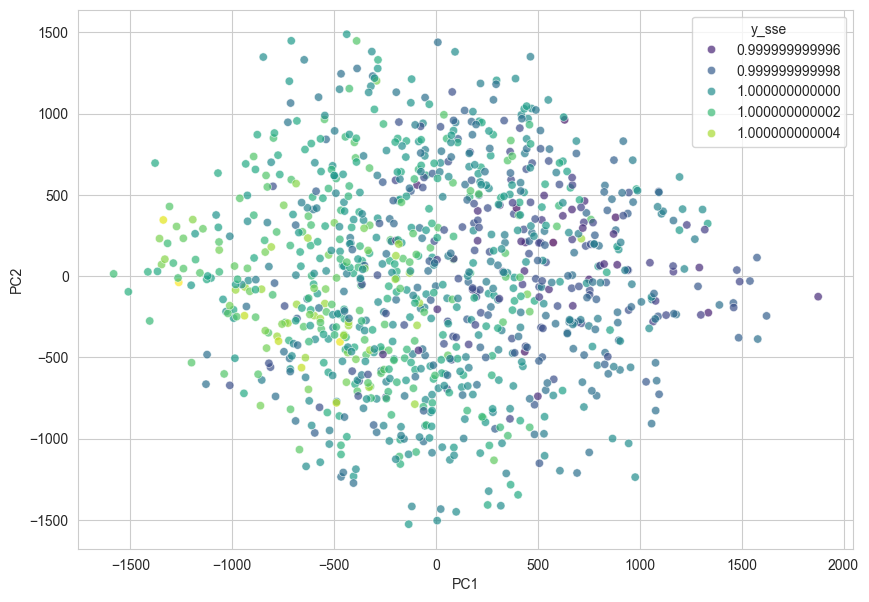

In [5]:
# Plotting the original data projected onto the first two principal components
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='y_sse', palette='viridis', marker='o', alpha=0.7)

# Labels and title
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('Projection of Linear Model with More Than 2 Factors')
# plt.legend()
plt.show()

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


# Generate sample data
np.random.seed(42)
n_w = 100
w = np.random.normal(3, 10, n_w)
c = 5
X = np.random.uniform(0, 10, (1000, n_w))
y = np.dot(X, w) + c + np.random.normal(0, 1, len(X))  # added noise

# Normalize the input data
# X_mean = np.mean(X, axis=0)
# X_std = np.std(X, axis=0)
# X_normalized = (X - X_mean) / X_std

# Normalize the target data
# y_mean = np.mean(y)
# y_std = np.std(y)
# y_normalized = (y - y_mean) / y_std

# Check if MPS is available
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(f'Using device: {device}')

# Convert to PyTorch tensors
# X_train = torch.tensor(X, dtype=torch.float32).to(device)
# y_train = torch.tensor(y, dtype=torch.float32).view(-1, 1).to(device)
X_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32).view(-1, 1)

class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.linear = nn.Linear(input_size, 1)
    
    def forward(self, x):
        return self.linear(x)

# Initialize the model, loss function, and optimizer
model = SimpleNN(input_size=n_w) # .to(device)  # Move model to device
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Create a DataLoader for mini-batch training
dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)

# Training loop
epochs = 1000
for epoch in range(epochs):
    for X_batch, y_batch in dataloader:
        # Move batch data to device
        # X_batch = X_batch.to(device)
        # y_batch = y_batch.to(device)
        
        model.train()
        
        # Forward pass
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

# Print learned weights
# learned_weights = model.linear.weight.detach().cpu().numpy().flatten()  # Move back to CPU for printing
# learned_bias = model.linear.bias.detach().cpu().numpy().flatten()
learned_weights = model.linear.weight.detach().numpy().flatten()  # Move back to CPU for printing
learned_bias = model.linear.bias.detach().numpy().flatten()
print(f'Learned weights: {learned_weights}')
print(f'Learned bias: {learned_bias}')
print(f'Actual weights: {w}')
print(f'Actual bias: {c}')

Using device: mps
Epoch 100/1000, Loss: 74583.4375
Epoch 200/1000, Loss: 50697.46875
Epoch 300/1000, Loss: 35175.390625
Epoch 400/1000, Loss: 16666.859375
Epoch 500/1000, Loss: 7682.396484375
Epoch 600/1000, Loss: 2050.626220703125
Epoch 700/1000, Loss: 482.8186340332031
Epoch 800/1000, Loss: 48.24528884887695
Epoch 900/1000, Loss: 2.8523964881896973
Epoch 1000/1000, Loss: 0.7656253576278687
Learned weights: [ 7.96930599e+00  1.62196898e+00  9.48099804e+00  1.82411804e+01
  6.60547674e-01  6.80975854e-01  1.87843418e+01  1.06519508e+01
 -1.68630242e+00  8.43000793e+00 -1.62530935e+00 -1.63416457e+00
  5.42353582e+00 -1.61252232e+01 -1.42556791e+01 -2.64728522e+00
 -7.11284971e+00  6.15155268e+00 -6.09387827e+00 -1.11175041e+01
  1.76729488e+01  7.52099991e-01  3.68029070e+00 -1.12477913e+01
 -2.43124652e+00  4.09652996e+00 -8.49601650e+00  6.77406931e+00
 -3.01227212e+00  1.00712307e-01 -2.99274731e+00  2.15262985e+01
  2.85700893e+00 -7.56693363e+00  1.12324295e+01 -9.21093178e+00
  5

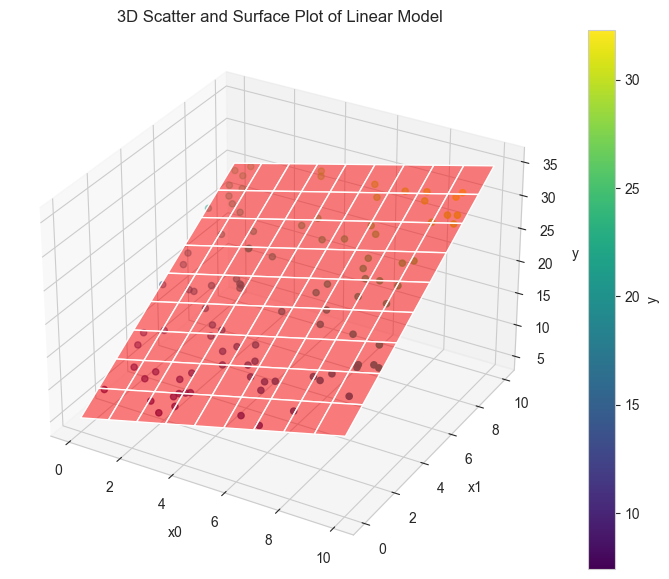

In [7]:
# Weights (including weight for each factor)
w = np.array([1, 2])

# Bias term
c = 5

# Generate a random matrix with values between 0 and 10
np.random.seed(42)  # For reproducibility
X = np.random.uniform(0, 10, (100, 2))  # 100 sets of factors, each with 2 elements

# Compute the linear model for each set of factors
y = np.dot(X, w) + c

# Create a DataFrame for plotting
df = pd.DataFrame(X, columns=['x0', 'x1'])
df['y'] = y

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the points
sc = ax.scatter(df['x0'], df['x1'], df['y'], c=df['y'], cmap='viridis', marker='o')

# Create meshgrid for surface plot
x0 = np.linspace(0, 10, 10)
x1 = np.linspace(0, 10, 10)
x0, x1 = np.meshgrid(x0, x1)
y_surface = w[0] * x0 + w[1] * x1 + c

# Surface plot of the linear model
ax.plot_surface(x0, x1, y_surface, color='r', alpha=0.5)

# Add color bar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('y')

# Labels
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
ax.set_title('3D Scatter and Surface Plot of Linear Model')

plt.show()

In [ ]:
np.random.seed(42)
w = np.array([1, 3.3])
c = 2.5
X = np.random.uniform(0, 10, (10, 2))
y = np.dot(X, w) + c

scatter = go.Scatter3d(
    x=X[:,0], 
    y=X[:,1], 
    z=y, 
    mode='markers',
    marker=dict(
        size=5,
        color=y,
        colorscale='Viridis',
    )
)

x_grid, y_grid = np.meshgrid(np.linspace(0, 10, 10), np.linspace(0, 10, 10))
z_grid = w[0] *  x_grid + w[1] * y_grid + c 
surface = go.Surface(
    x=x_grid,
    y=y_grid,
    z=z_grid,
    colorscale='Viridis',
    opacity=0.5
)

go.Figure(data=[scatter, surface])

In [ ]:
X[0]

In [ ]:
X_mean

In [ ]:
X.mean(axis=0)